In [1]:
# PROBLEM STATEMENT- Predicting the customer-Churn (YES/NO) based on various features.

# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import io
%cd "C:\Users\ADMIN\Desktop\PYTHON\PYTHON MOCK TEST" 

C:\Users\ADMIN\Desktop\PYTHON\PYTHON MOCK TEST


In [4]:
telecomchurn=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
telecomchurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telecomchurn.TotalCharges=pd.to_numeric(telecomchurn.TotalCharges,errors='coerce')

In [7]:
telecomchurn.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
telecomchurn.dropna(inplace=True) # HERE TotalCharges Having 0.15 % of empty spaces that's why we dropped that 11 rows bc it 
# will make significant impact to the model building.

In [9]:
telecomchurn.isna().sum().any()

False

In [10]:
telecomchurn.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [11]:
telecomchurn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [12]:
telecomchurn.shape

(7032, 21)

In [13]:
telecomchurn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
telecomchurn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
telecomchurn.isnull().sum().sort_values(ascending=False)
# No missing value found

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

In [16]:
telecomchurn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# EDA

<AxesSubplot:ylabel='Frequency'>

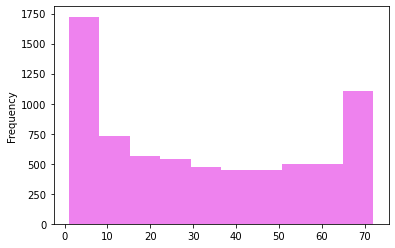

In [17]:
telecomchurn.tenure.plot(kind="hist",color="violet")

<AxesSubplot:>

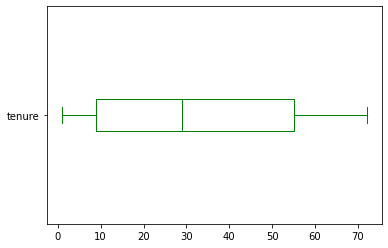

In [18]:
telecomchurn.tenure.plot(kind="box",vert=False,color="green")

<AxesSubplot:ylabel='Density'>

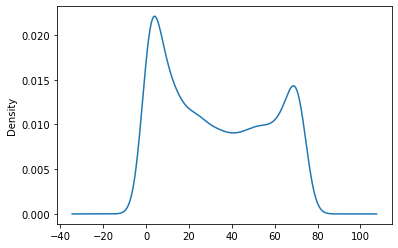

In [19]:
telecomchurn.tenure.plot(kind="density")

# Monthly charges

<AxesSubplot:ylabel='Frequency'>

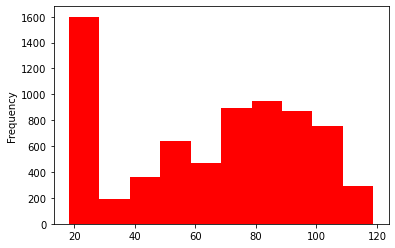

In [20]:
telecomchurn.MonthlyCharges.plot(kind="hist",color="red")

<AxesSubplot:>

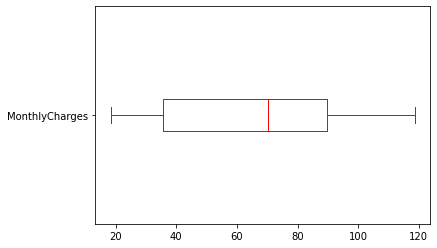

In [21]:
telecomchurn.MonthlyCharges.plot(kind="box",vert=False,color="red")

<AxesSubplot:ylabel='Density'>

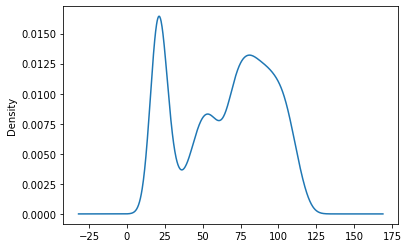

In [22]:
telecomchurn.MonthlyCharges.plot(kind="density")

In [23]:
telecomchurn.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [24]:
telecomchurn.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [25]:
telecomchurn.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [26]:
telecomchurn.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

<AxesSubplot:xlabel='Churn'>

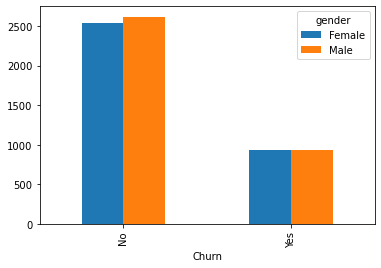

In [27]:
pd.crosstab(telecomchurn.Churn,telecomchurn.gender).plot(kind="bar",stacked=False)

<AxesSubplot:xlabel='Churn'>

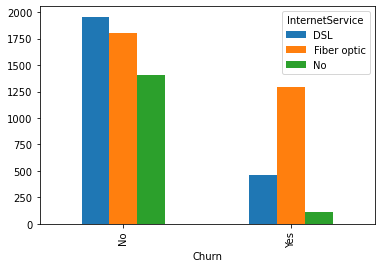

In [28]:
pd.crosstab(telecomchurn.Churn,telecomchurn.InternetService).plot(kind="bar",stacked=False)

<AxesSubplot:xlabel='gender'>

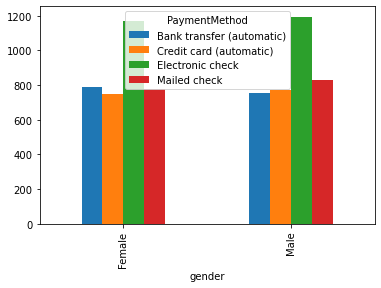

In [29]:
pd.crosstab(telecomchurn.gender,telecomchurn.PaymentMethod).plot(kind="bar",stacked=False)

In [30]:
telecomchurn.MonthlyCharges.groupby(telecomchurn.gender).mean()

gender
Female    65.216652
Male      64.387546
Name: MonthlyCharges, dtype: float64

<AxesSubplot:xlabel='gender'>

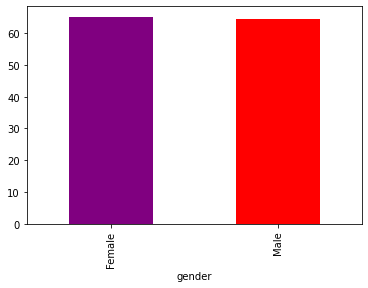

In [31]:
telecomchurn.MonthlyCharges.groupby(telecomchurn.gender).mean().plot(kind="bar",stacked=True,color=['purple','red'])

<AxesSubplot:xlabel='SeniorCitizen'>

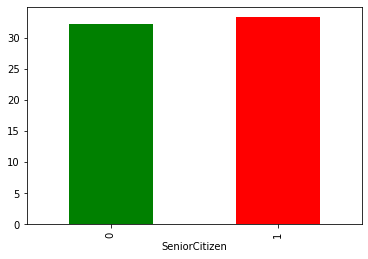

In [32]:
telecomchurn.tenure.groupby(telecomchurn.SeniorCitizen).mean().plot(kind="bar",stacked=True,color=['green','red'])

<AxesSubplot:xlabel='PaymentMethod'>

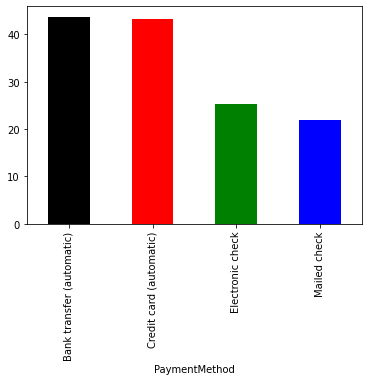

In [33]:
telecomchurn.tenure.groupby(telecomchurn.PaymentMethod).mean().plot(kind="bar",stacked=True,color=['black','red','green','blue','cyan'])

<AxesSubplot:xlabel='InternetService'>

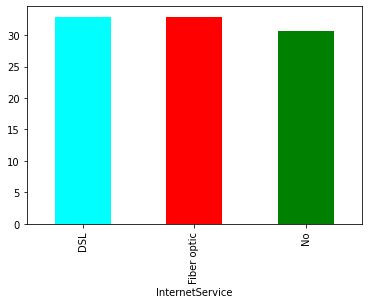

In [34]:
telecomchurn.tenure.groupby(telecomchurn.InternetService).mean().plot(kind="bar",stacked=True,color=['cyan','red','green'])

<AxesSubplot:xlabel='StreamingMovies'>

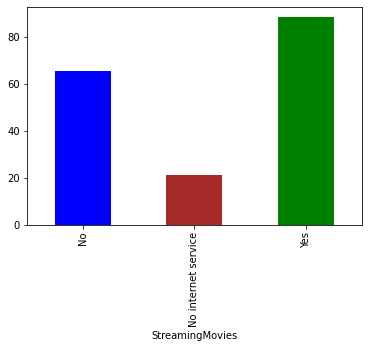

In [35]:
telecomchurn.MonthlyCharges.groupby(telecomchurn.StreamingMovies).mean().plot(kind="bar",stacked=True,color=['blue','brown','green'])

# Hypothesis Testing

In [36]:
telecomchurn.MonthlyCharges.groupby(telecomchurn.Churn).mean()

Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [37]:
telecomchurn.MonthlyCharges.groupby(telecomchurn.Churn).var()

Churn
No     966.871469
Yes    608.414183
Name: MonthlyCharges, dtype: float64

In [38]:
# Here mean or averages & variance of groups are coming different.
# Now, we can go for the hypothesis testing ,  
# Hypothesis testing - Average MonthlyCharges paid by Churn Yes/No 

# Statement creation:-
# NULL - There is No Significant difference in Average Monthly Charges of Churn Yes/No
# ALT - There is Significant difference in Average Monthly Charges of Churn Yes/No

In [39]:
# Split Data Frame into Churnyes & churnno
churnyes=telecomchurn[telecomchurn.Churn=="Yes"]
churnno=telecomchurn[telecomchurn.Churn=="No"]

In [40]:
print(churnyes.shape)
print(churnno.shape)

(1869, 21)
(5163, 21)


In [41]:
from scipy.stats import ttest_ind

In [42]:
ttest_ind(churnyes.MonthlyCharges,churnno.MonthlyCharges,equal_var=False)
# Since p-value=8.592449331547539e-73, Which is less than 0.05, REJECT NULL

Ttest_indResult(statistic=18.34091879095257, pvalue=2.657357144516026e-72)

In [43]:
# Hypothesis testing - Average tenure paid by Churn Yes/No 

# Statement creation:-
# NULL - There is No Significant difference in Average tenure of Churn Yes/No
# ALT - There is Significant difference in Average tenure of Churn Yes/No

In [44]:
ttest_ind(churnyes.tenure,churnno.tenure,equal_var=False)
# Since p-value=1.1954945472607148e-232, Which is less than 0.05, REJECT NULL

Ttest_indResult(statistic=-34.971870097503476, pvalue=2.347074718895754e-234)

In [45]:
# Hypothesis testing - Average MonthlyCharges paid by Different PaymentMethod  

# Statement creation:-
# NULL - There is No Significant difference in Average MonthlyCharges paid by Different PaymentMethod
# ALT - There is Significant difference in Average MonthlyCharges paid by Different PaymentMethod

In [46]:
telecomchurn.MonthlyCharges.groupby(telecomchurn.PaymentMethod).mean()
# The mean for all the categories is different.

PaymentMethod
Bank transfer (automatic)    67.205577
Credit card (automatic)      66.519264
Electronic check             76.255814
Mailed check                 43.958354
Name: MonthlyCharges, dtype: float64

In [47]:
# Split Different PaymentMethod into indivisual Data Frame
bt=telecomchurn[telecomchurn.PaymentMethod=="Bank transfer (automatic)"]
cc=telecomchurn[telecomchurn.PaymentMethod=="Credit card (automatic)"]
ec=telecomchurn[telecomchurn.PaymentMethod=="Electronic check"]
mc=telecomchurn[telecomchurn.PaymentMethod=="Mailed check"]

In [48]:
from scipy.stats import f_oneway

In [49]:
f_oneway(bt.MonthlyCharges,cc.MonthlyCharges,ec.MonthlyCharges,mc.MonthlyCharges)
# Since pvalue=MonthlyCharges is less than 0.05, REJECT NULL

F_onewayResult(statistic=447.39772663320394, pvalue=5.041536525100443e-266)

In [50]:
# Hypothesis testing - Average tenure paid by Different PaymentMethod  

# Statement creation:-
# NULL - There is No Significant difference in Average tenure paid by Different PaymentMethod
# ALT - There is Significant difference in Average tenure paid by Different PaymentMethod

In [51]:
telecomchurn.tenure.groupby(telecomchurn.PaymentMethod).mean()
# The mean for all the categories is different.

PaymentMethod
Bank transfer (automatic)    43.713359
Credit card (automatic)      43.297830
Electronic check             25.174630
Mailed check                 21.938903
Name: tenure, dtype: float64

In [52]:
f_oneway(bt.tenure,cc.tenure,ec.tenure,mc.tenure)
# Since p-value=1.503848361277172e-265 is less than 0.05, REJECT NULL

F_onewayResult(statistic=445.6300438001573, pvalue=4.666987312809702e-265)

In [53]:
# Hypothesis testing - No Association between gender and Churn
# Null - There is no association between gender & churn
# Alt - There is association between gender & churn

In [54]:
pd.crosstab(telecomchurn.gender,telecomchurn.Churn)

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


In [55]:
from scipy.stats import chi2_contingency

In [56]:
chi2_contingency(pd.crosstab(telecomchurn.gender,telecomchurn.Churn))
# Since p-value=0.48657873605618596 is greater than 0.05, Fail to Reject Null

(0.47545453727386294,
 0.4904884707065509,
 1,
 array([[2557.27090444,  925.72909556],
        [2605.72909556,  943.27090444]]))

In [57]:
# Hypothesis testing - No Association between SeniorCitizen & Churn
# Null - There is no association between SeniorCitizen & Churn
# Alt - There is association between SeniorCitizen & Churn

In [58]:
pd.crosstab(telecomchurn.SeniorCitizen,telecomchurn.Churn)

Churn,No,Yes
SeniorCitizen,,
0,4497,1393
1,666,476


In [59]:
chi2_contingency(pd.crosstab(telecomchurn.SeniorCitizen,telecomchurn.Churn))
# Since p-value=1.510066805092378e-36 is less than 0.05, Reject Null

(158.4408162893713,
 2.4792557203954705e-36,
 1,
 array([[4324.52645051, 1565.47354949],
        [ 838.47354949,  303.52645051]]))

# Spiliting the Different columns into numericcols & objectcols

In [60]:
numericcols=telecomchurn.select_dtypes(include=np.number)
objectcols=telecomchurn.select_dtypes(include=['object'])

In [61]:
print(numericcols.columns)
print(objectcols.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [62]:
# moving the variables to respected places

In [65]:
objectcols["SeniorCitizen"]=numericcols.SeniorCitizen

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_7468/1030182631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectcols["SeniorCitizen"]=numericcols.SeniorCitizen


In [66]:
numericcols=numericcols.drop("SeniorCitizen",axis=1)

In [67]:
print(numericcols.columns)
print(objectcols.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn',
       'SeniorCitizen'],
      dtype='object')


In [68]:
numericcols.dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

# Label Encoding

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le= LabelEncoder()

In [71]:
objectcolsnew= objectcols.apply(le.fit_transform)

In [72]:
objectcolsnew.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,5365,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
1,3953,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0
2,2558,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0
3,5524,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0
4,6500,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0


In [73]:
numericcols.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [74]:
combinedf=pd.concat([numericcols,objectcolsnew],axis=1)

In [75]:
combinedf.head()

,tenure,MonthlyCharges,TotalCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,1,29.85,29.85,5365,0,1,0,0,1,0,...,2,0,0,0,0,0,1,2,0,0
1,34,56.95,1889.50,3953,1,0,0,1,0,0,...,0,2,0,0,0,1,0,3,0,0
2,2,53.85,108.15,2558,1,0,0,1,0,0,...,2,0,0,0,0,0,1,3,1,0
3,45,42.30,1840.75,5524,1,0,0,0,1,0,...,0,2,2,0,0,1,0,0,0,0
4,2,70.70,151.65,6500,0,0,0,1,0,1,...,0,0,0,0,0,0,1,2,1,0


In [76]:
combinedf=combinedf.drop("customerID",axis=1)

In [77]:
combinedf.shape

(7032, 20)

In [78]:
combinedf.head()

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
1,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0
2,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0
3,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0
4,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0


In [79]:
combinedf.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

# SPILITING DATA INTO x & y

In [80]:
y=combinedf.Churn
X=combinedf.drop("Churn",axis=1)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

# Logistic Regression 

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
logreg=LogisticRegression(max_iter=1000)

In [85]:
logregmodel=logreg.fit(X_train,y_train)

In [86]:
logregmodel.score(X_train,y_train) #Accuracy of train data=0.80

0.802519301097115

In [87]:
ypred=logregmodel.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [89]:
confusion_matrix(ypred,y_test)

array([[1374,  246],
       [ 175,  315]], dtype=int64)

In [90]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1620
           1       0.56      0.64      0.60       490

    accuracy                           0.80      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.81      0.80      0.80      2110



In [91]:
accuracy_score(y_test,ypred)

0.8004739336492891

In [92]:
from sklearn.metrics import plot_roc_curve

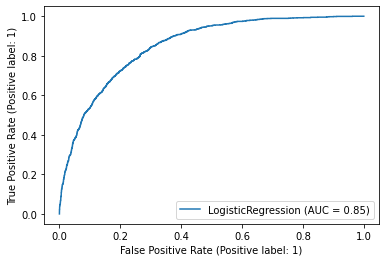

In [93]:
plot_roc_curve(logreg,X_train,y_train) ## AUC=0.85

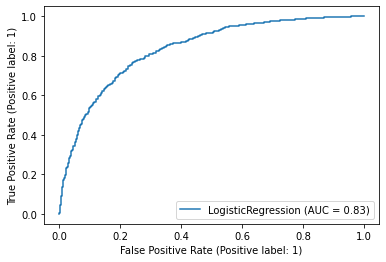

In [94]:
plot_roc_curve(logreg,X_test,y_test)  # AUC=0.83

# DECISION TREE

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
tree=DecisionTreeClassifier()

In [97]:
treemodel=tree.fit(X_train,y_train)

In [98]:
treemodel.score(X_train,y_train) # Accuracy=0.99

0.9973587972368956

In [99]:
ypred=treemodel.predict(X_test)

In [100]:
confusion_matrix(ypred,y_test)

array([[1247,  281],
       [ 302,  280]], dtype=int64)

In [101]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1528
           1       0.50      0.48      0.49       582

    accuracy                           0.72      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.72      0.72      0.72      2110



In [102]:
accuracy_score(y_test,ypred) # Accuracy of test data = 0.72

0.723696682464455

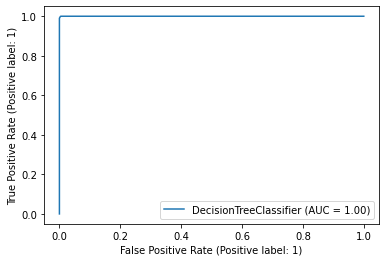

In [103]:
plot_roc_curve(tree,X_train,y_train) ## AUC= 1

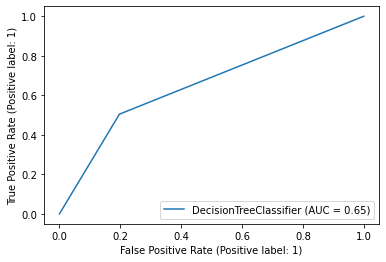

In [104]:
plot_roc_curve(tree,X_test,y_test) ## AUC= 0.65

# RandomForest

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf=RandomForestClassifier()

In [107]:
rfmodel=rf.fit(X_train,y_train)

In [108]:
rfmodel.score(X_train,y_train) # Accuracy=0.99

0.9973587972368956

In [109]:
ypred=rfmodel.predict(X_test)

In [110]:
confusion_matrix(ypred,y_test)

array([[1385,  287],
       [ 164,  274]], dtype=int64)

In [111]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1672
           1       0.49      0.63      0.55       438

    accuracy                           0.79      2110
   macro avg       0.69      0.73      0.70      2110
weighted avg       0.81      0.79      0.80      2110



In [112]:
accuracy_score(y_test,ypred) # Accuracy of test data= 0.78

0.7862559241706161

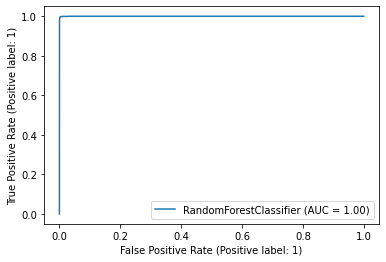

In [113]:
plot_roc_curve(rfmodel,X_train,y_train) ## AUC= 1

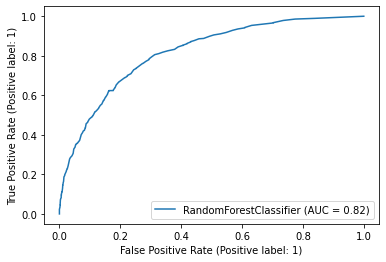

In [114]:
plot_roc_curve(rfmodel,X_test,y_test) ## AUC= 0.82

# Gradient Boosting

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

In [116]:
gbm=GradientBoostingClassifier()

In [117]:
gbmmodel=gbm.fit(X_train,y_train)

In [118]:
gbmmodel.score(X_train,y_train) # Accuracy=0.83

0.8315725314912638

In [119]:
ypred=gbmmodel.predict(X_test)

In [120]:
confusion_matrix(ypred,y_test)

array([[1407,  274],
       [ 142,  287]], dtype=int64)

In [121]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1681
           1       0.51      0.67      0.58       429

    accuracy                           0.80      2110
   macro avg       0.71      0.75      0.73      2110
weighted avg       0.83      0.80      0.81      2110



In [122]:
accuracy_score(y_test,ypred) # Accuracy of test data= 0.80

0.8028436018957346

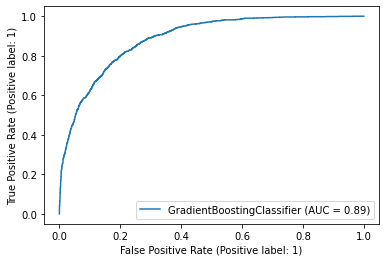

In [123]:
plot_roc_curve(gbmmodel,X_train,y_train) ## AUC= 0.89

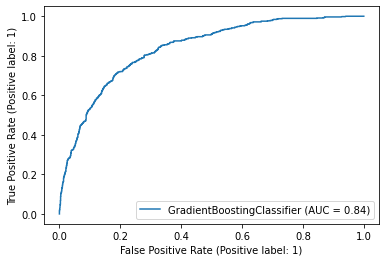

In [124]:
plot_roc_curve(gbmmodel,X_test,y_test) ## AUC= 0.84

# Naive bayes

In [125]:
from sklearn.naive_bayes import GaussianNB

In [126]:
nb=GaussianNB()

In [127]:
nbmodel=nb.fit(X_train,y_train)

In [128]:
nbmodel.score(X_train,y_train)  #Accuracy=0.75

0.7557903291344982

In [129]:
ypred=nbmodel.predict(X_test)

In [130]:
confusion_matrix(ypred,y_test)

array([[1165,  150],
       [ 384,  411]], dtype=int64)

In [131]:
print(classification_report(ypred,y_test)) 

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1315
           1       0.73      0.52      0.61       795

    accuracy                           0.75      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.74      0.75      0.74      2110



In [132]:
accuracy_score(y_test,ypred) # Accuracy of test data= 0.74

0.7469194312796209

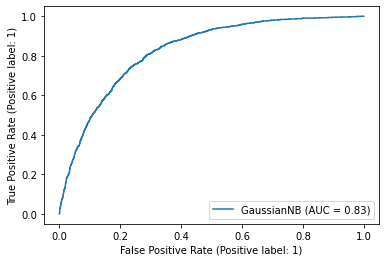

In [133]:
plot_roc_curve(nbmodel,X_train,y_train) ## AUC= 0.83

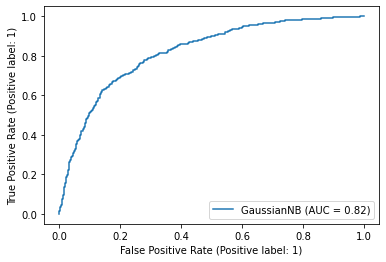

In [134]:
plot_roc_curve(nbmodel,X_test,y_test) #Auc= 0.82

# Neural Network

In [135]:
from sklearn.neural_network import MLPClassifier

In [136]:
mlp=MLPClassifier()

In [137]:
mlpmodel=mlp.fit(X_train,y_train)

In [138]:
mlpmodel.score(X_train,y_train)  #Accuracy=0.74

0.7885006095083299

In [139]:
ypred=mlpmodel.predict(X_test)

In [140]:
confusion_matrix(ypred,y_test)

array([[1315,  212],
       [ 234,  349]], dtype=int64)

In [141]:
print(classification_report(ypred,y_test)) 

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1527
           1       0.62      0.60      0.61       583

    accuracy                           0.79      2110
   macro avg       0.74      0.73      0.73      2110
weighted avg       0.79      0.79      0.79      2110



In [142]:
accuracy_score(y_test,ypred) # Accuracy of test data= 0.71

0.7886255924170616

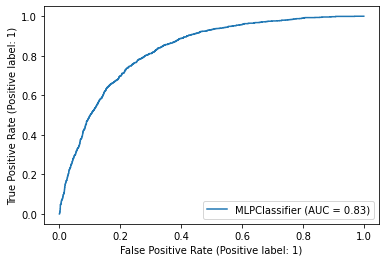

In [143]:
plot_roc_curve(mlpmodel,X_train,y_train) ## AUC= 0.83

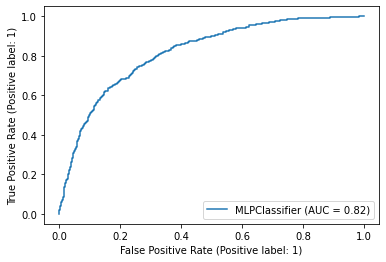

In [144]:
plot_roc_curve(mlpmodel,X_test,y_test) #AUC=0.82

# Conclusion Table

In [145]:
MODELS = [["LogisticRegression", logregmodel.score(X_train,y_train), logregmodel.score(X_test,y_test)],
             ["DecisionTreeClassifier", treemodel.score(X_train,y_train),treemodel.score(X_test,y_test)],
             ["RandomForestClassifier", rfmodel.score(X_train,y_train),rfmodel.score(X_test,y_test)],
             ["GradientBoostingClassifier", gbmmodel.score(X_train,y_train),gbmmodel.score(X_test,y_test)],
             ["NaiveBayesClassifier", nbmodel.score(X_train,y_train),nbmodel.score(X_test,y_test)],
             ["MLPClassifier", mlpmodel.score(X_train,y_train),mlpmodel.score(X_test,y_test)]]

In [146]:
pd.DataFrame(MODELS,columns=["MODELS","Train_Accuracy","Test_Accuracy"])

,MODELS,Train_Accuracy,Test_Accuracy
0,LogisticRegression,0.802519,0.800474
1,DecisionTreeClassifier,0.997359,0.723697
2,RandomForestClassifier,0.997359,0.786256
3,GradientBoostingClassifier,0.831573,0.802844
4,NaiveBayesClassifier,0.755790,0.746919
5,MLPClassifier,0.788501,0.788626


# So finally by looking to the above table we can conclude that both LogisticRegression & MLPClassifier is the best suit model for this Dataset.